Everyone's favorite nerdy comic, XKCD, ranked colors by best tasting. I thought I would use the WTB dataset to compare and see if the data agrees.

![Best tasting colors](https://imgs.xkcd.com/comics/best_tasting_colors.png)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
# Import the data
import WTBLoad
wtb = WTBLoad.load_frame()

In [2]:
pink = ["watermelon", "cranberry"]
red = ["cherry","apple","raspberry","strawberry", "rose hips", "hibiscus",'rhubarb', "red wine"]
blue = ["blueberry","juniper berries"]
green = ["green tea","mint","lemon grass",'cucumber','basil']
white = ["pear", "elderflower", "ginger", "coconut","piña colada","vanilla","white wine"]
brown = [ "chai", "chicory", "coriander", "cardamom", "seeds of paradise", "cinnamon", "chocolate", "peanut butter", "hazelnut","pecan","bacon","bourbon","whiskey","coffee","oak","rye","maple"]
orange = ["apricot", "peach", "grapefruit","orange peel", "pumpkin","sweet potato"]
yellow = ["chamomile","lemon peel"]
purple = [ "plum", "lavender", "port","blackberry"]
black = [ "anise", 'peppercorn', 'lemon pepper', "smoke"]
additionsColors = {"pink": pink,"red": red,"blue": blue,"green": green,"white": white,"brown": brown,"orange": orange,"yellow": yellow,"purple": purple, "black": black}

In [3]:
# Great. Now we have a mapping from color to addition, but we really need it the other way around.
additionToColor = {}
for color in additionsColors:
    for addition in additionsColors[color]:
        additionToColor[addition] = color
print(additionToColor['watermelon'])

pink


Let's add a `color` column.

In [4]:
def addcolor(addition):
    return additionToColor[addition]
wtb['color'] = np.vectorize(addcolor)(wtb['addition'])

Now group by the new color column, get the mean, and sort the values high to low.

In [5]:
wtb.groupby(by='color').mean().sort_values('vote',ascending=False)

,vote
color,
blue,0.512541
brown,0.510719
orange,0.505209
purple,0.499319
yellow,0.493065
red,0.484784
black,0.482717
white,0.471580
pink,0.466509


There we have it. Blue is the best tasting color. 

But brown is awfully close. I wonder how the ranges compare. Let's take a look at a histogram.

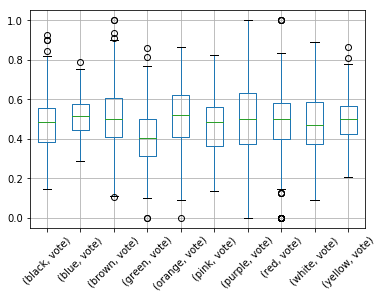

In [6]:
%matplotlib inline
wtb.groupby(by='color').boxplot(subplots=False,rot=45)

There we can see that while blue has a slightly higher average, brown has a lot of very high and very low outliers.

For more analysis, check out the [What To Brew blog](http://whattobrew.com/blog/2017/03/18/sorry-xkcd-pink-not-best-tasting-color/).